In [1]:
import os
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import toshi

# file = os.path.expanduser('~/Downloads/20200614_150015.256007-87-02.iqData.XXXX.AKITA.dat')
file = os.path.expanduser('~/Downloads/20200615_010423.194421-8C-02.iqData.XXXX.AKITA.dat')
filesize = os.path.getsize(file)

plt.style.use('./darkmode.style')

In [2]:
s = time.time()
ray_pulses = toshi.read(file)
e = time.time()
print('Data read in {:.2f} s'.format(e - s))

Data read in 2.17 s


In [3]:
naz = len(ray_pulses)
ngate = ray_pulses[0][0].ngate_long_hi
# ngate = ray_pulses[0][0].ngate_short_hi
z = np.zeros((naz, ngate), dtype=np.single)
v = np.zeros((naz, ngate), dtype=np.single)

for k, pulses in enumerate(ray_pulses):
    p = np.zeros((len(pulses), ngate), dtype=np.csingle)
    for j, pulse in enumerate(pulses):
        p[j, :] = pulse.h_long_hi
        #p[j, :] = pulse.h_short_hi
    v[k, :] = np.angle(np.sum(p[1:, :] * np.conj(p[:-1, :]), axis=0))
#     v[k, :] = np.angle(np.sum(np.multiply(p[1:, :], np.conj(p[:-1, :])), axis=0))
    z[k, :] = 20 * np.log10(np.sum(np.abs(p), axis=0)) - 60
# v[z < -10] = np.nan

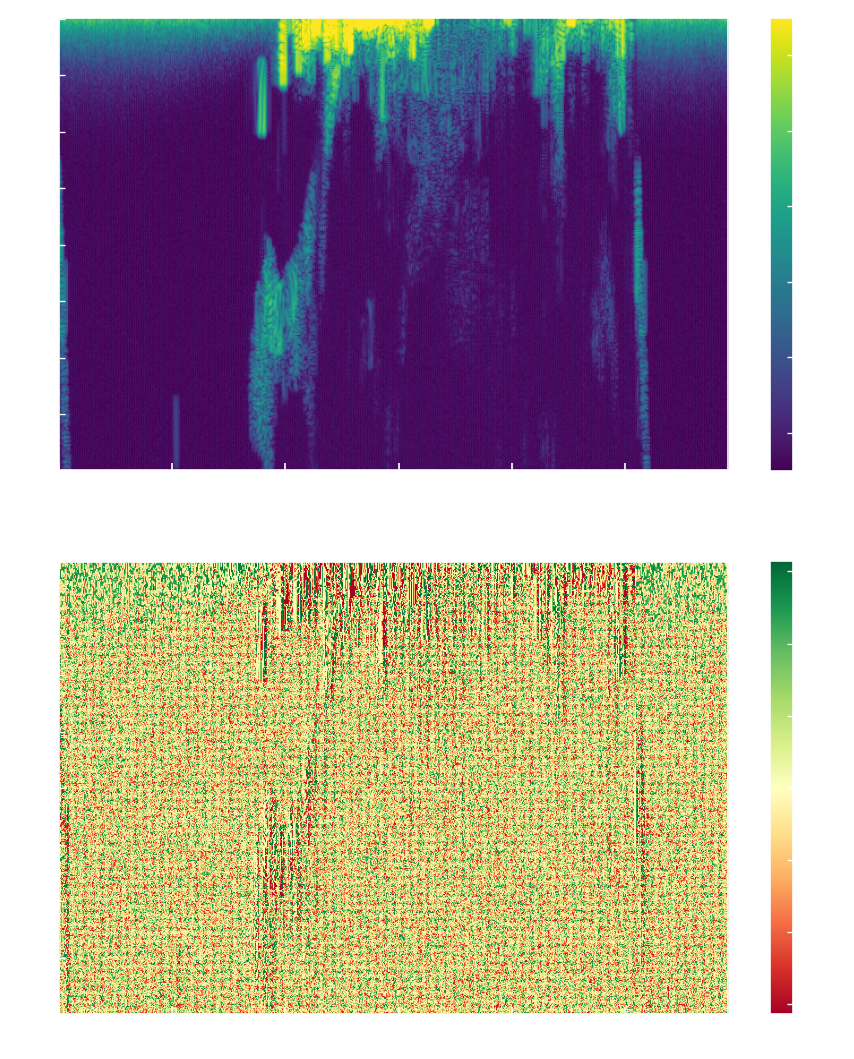

In [4]:
plt.figure(figsize=(9, 11), dpi=120)
plt.subplot(2, 1, 1)
plt.imshow(z[:, :400].T, vmin=-15, vmax=45)
plt.colorbar()

cmap = matplotlib.cm.RdYlGn
plt.subplot(2, 1, 2)
plt.imshow(v[:, :400].T, cmap=cmap, vmin=-np.pi, vmax=np.pi)
plt.colorbar()

In [7]:
a = 30
pulses = ray_pulses[a]
ngate = pulses[0].ngate_long_hi
p = np.zeros((len(pulses), ngate), dtype=np.csingle)
for j, pulse in enumerate(pulses):
    #print('AZ:{:.2f}'.format(pulse.azimuth))
    p[j, :] = pulse.h_long_hi

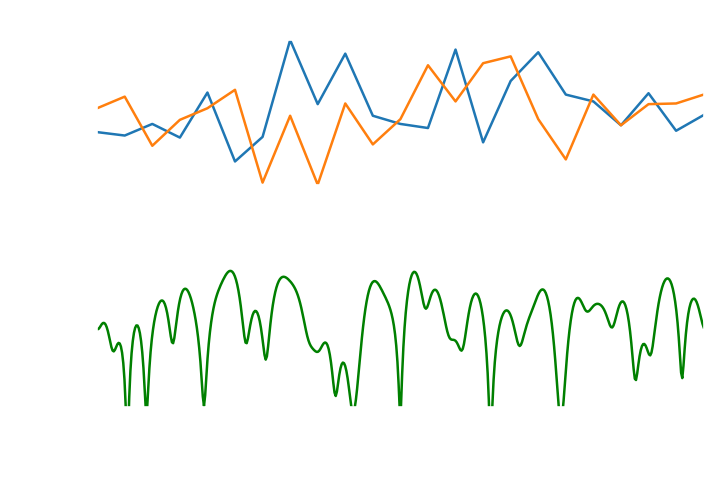

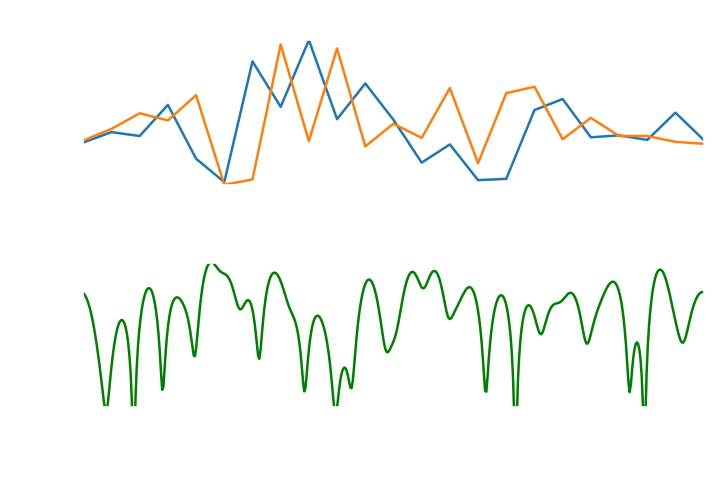

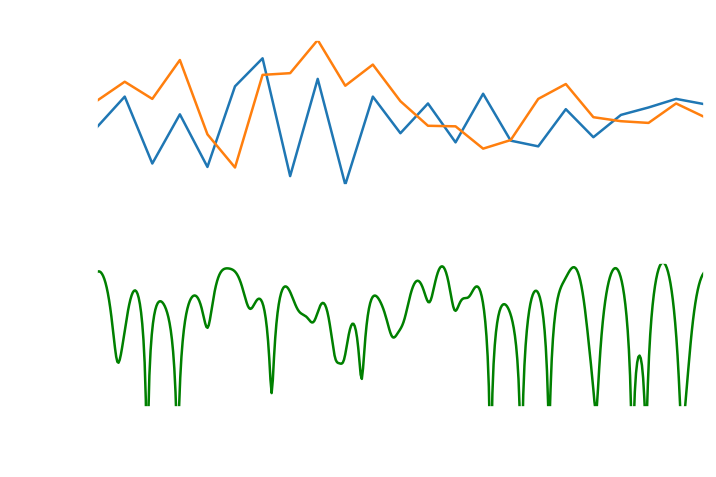

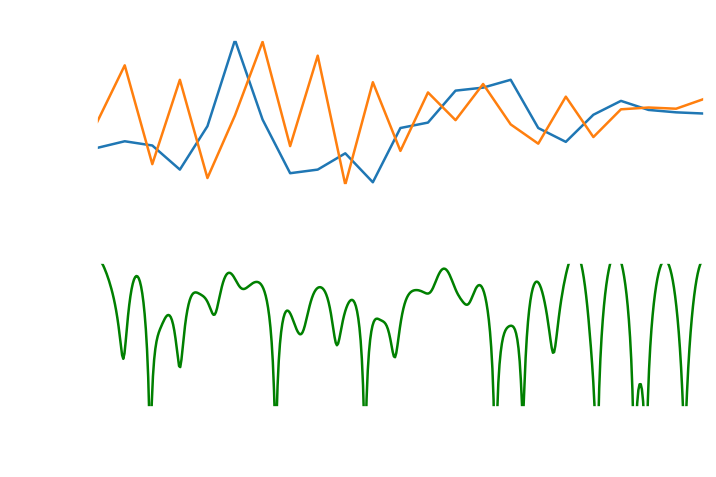

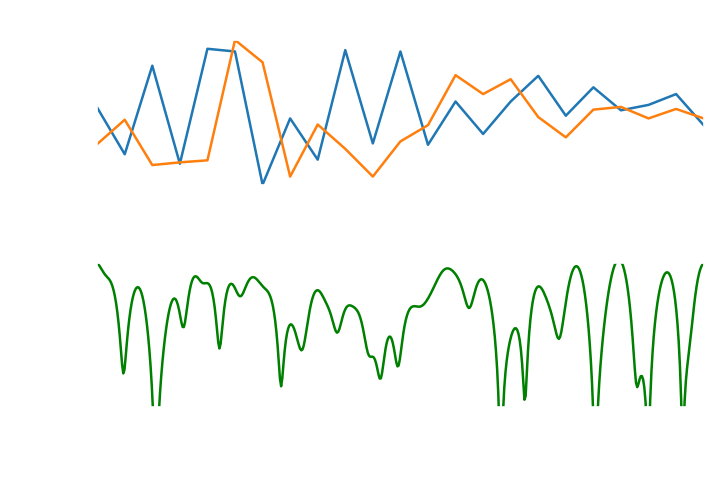

In [8]:
# for g in range(280, 285):
for g in range(20, 25):
    fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120)
    axes[0].plot(np.real(p[::2, g]))
    axes[0].plot(np.imag(p[::2, g]))
    axes[0].set_xlabel('Samples')
    axes[0].set_ylabel('Int-16')
    axes[0].set_title('Azimuth {} ({:.2f}-{:.2f} deg) Gate {}'.format(
        a, pulses[0].azimuth, pulses[-1].azimuth, g))
    
    f = np.fft.fftshift(np.fft.fft(p[:, g], 512))
    w = np.arange(-256, 256) / 512 * np.pi
    axes[1].plot(w, 20 * np.log10(np.abs(f)), 'g')
    axes[1].set_ylim((40, 60))
    axes[1].set_ylabel('Uncal. Power (dB)')
    axes[1].set_xlabel('Normalized Frequency (rad/sample)')
    
    fig.tight_layout(pad=0.8)